### 示例代码5-2-1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 读入学习数据
train = np.loadtxt('click.csv', delimiter=',', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

# 绘图

plt.plot(train_x, train_y, 'o')
plt.show()

<Figure size 640x480 with 1 Axes>

### 示例代码5-2-2

In [2]:
# 参数初始化
theta0 = np.random.rand()
theta1 = np.random.rand()

# 预测函数
def f(x):
    return theta0 + theta1 * x

# 目标函数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

### 示例代码5-2-3

In [3]:
# 标准化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

### 示例代码5-2-4

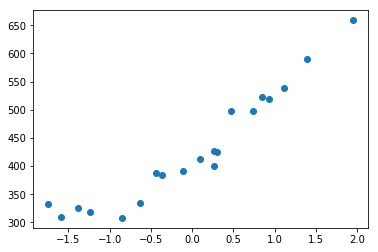

In [4]:
plt.plot(train_z, train_y, 'o')

plt.show()

### 示例代码5-2-5

In [5]:
# 学习率
ETA = 1e-3

# 误差的差值
diff = 1

# 更新次数
count = 0

# 直到误差的差值小于0.01为止，重复参数更新
error = E(train_z, train_y)
while diff > 1e-2:
    # 更新结果保存到临时变量
    tmp_theta0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp_theta1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)

    # 更新参数
    theta0 = tmp_theta0
    theta1 = tmp_theta1

    # 计算与上一次误差的差值
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error

    # 输出日志
    count += 1
    log = '第{}次: theta0 = {:.3f}, theta1 = {:.3f}, 差值 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))

第1次: theta0 = 9.026, theta1 = 1.899, 差值 = 76235.6995
第2次: theta0 = 17.429, theta1 = 3.731, 差值 = 73216.7658
第3次: theta0 = 25.663, theta1 = 5.526, 差值 = 70317.3819
第4次: theta0 = 33.733, theta1 = 7.285, 差值 = 67532.8136
第5次: theta0 = 41.641, theta1 = 9.009, 差值 = 64858.5141
第6次: theta0 = 49.391, theta1 = 10.698, 差值 = 62290.1170
第7次: theta0 = 56.987, theta1 = 12.354, 差值 = 59823.4283
第8次: theta0 = 64.430, theta1 = 13.976, 差值 = 57454.4206
第9次: theta0 = 71.724, theta1 = 15.566, 差值 = 55179.2255
第10次: theta0 = 78.873, theta1 = 17.125, 差值 = 52994.1282
第11次: theta0 = 85.878, theta1 = 18.652, 差值 = 50895.5607
第12次: theta0 = 92.744, theta1 = 20.148, 差值 = 48880.0965
第13次: theta0 = 99.472, theta1 = 21.615, 差值 = 46944.4447
第14次: theta0 = 106.065, theta1 = 23.052, 差值 = 45085.4447
第15次: theta0 = 112.527, theta1 = 24.461, 差值 = 43300.0611
第16次: theta0 = 118.860, theta1 = 25.841, 差值 = 41585.3787
第17次: theta0 = 125.065, theta1 = 27.194, 差值 = 39938.5977
第18次: theta0 = 131.147, theta1 = 28.519, 差值 = 38357.0292
第1

### 示例代码5-2-6

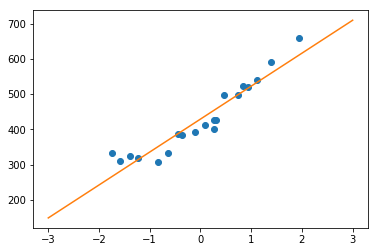

In [6]:
# 绘图确认
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))
plt.show()

### 示例代码5-2-7 验证数据

In [7]:
f(standardize(100))

370.96734094547423

In [8]:
f(standardize(200))

510.46964366017573

In [9]:
f(standardize(300))

649.9719463748772

### 示例代码5-2-8

In [10]:
# 初始化参数
theta = np.random.rand(3)

# 创建学习数据的矩阵
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x ** 2]).T

X = to_matrix(train_z)

# 预测函数
def f(x):
    return np.dot(x, theta)

### 示例代码5-2-9

In [11]:
# 误差的差值
diff = 1

# 重复学习
error = E(X, train_y)
while diff > 1e-2:
    # 更新参数
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    # 计算与上一次误差的差值
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

### 示例代码5-2-10

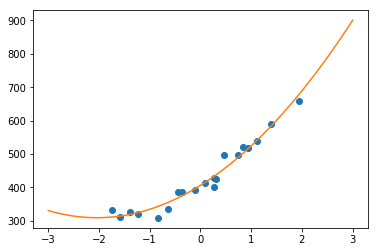

In [12]:
x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()

### 示例代码5-2-11

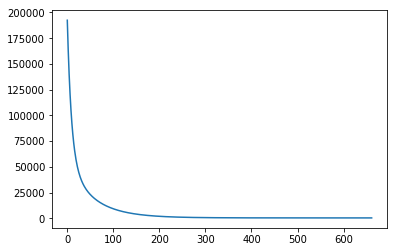

In [13]:
# 均方误差
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

# 用随机值初始化参数
theta = np.random.rand(3)

# 均方误差的历史记录
errors = []

# 誤差の差分
diff = 1

# 重复学习
errors.append(MSE(X, train_y))
while diff > 1e-2:
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]

# 绘制误差变化图
x = np.arange(len(errors))

plt.plot(x, errors)
plt.show()

### 示例代码5-2-12

In [14]:
# 用随机数对参数初始化
theta = np.random.rand(3)

# 均方误差的历史记录
errors = []

# 误差的差值
diff = 1

# 重复学习
errors.append(MSE(X, train_y))
while diff > 1e-2:
    # 为了调整学习数据的顺序，准备随机的序列
    p = np.random.permutation(X.shape[0])
    # 随机取出学习数据，使用随机梯度下降法更新参数
    for x, y in zip(X[p,:], train_y[p]):
        theta = theta - ETA * (f(x) - y) * x
    # 计算与前一次的误差的差值
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]

### 示例代码5-2-13

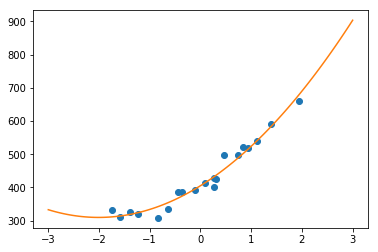

In [15]:
x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()